# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autora rozwiązania (imię, nazwisko i numer indeksu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Imię i nazwisko:
Numer indeksu:

---

# Kolowkium zaliczeniowe: 1 termin, grupa 1

In [10]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

## Dane do automatycznych testów

In [2]:
# Dane do testów 1
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=20, random_state=7), columns=["X"])
test_data_1.head()

,X
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


In [3]:
test_data_2 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=15, random_state=7), columns=["X"])
test_data_2.head()

,X
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


## Zadanie 1 [4 pkt]

Badania kliniczne pokazały, że po podaniu pewnego leku w 10% przypadków występują skutki uboczne wymagające hospitalizacji.

W pewnej klinice podano lek grupie 30 pacjentów. Jakie jest prawdopodobieństwo, że co najmniej 25 z tych osób nie będzie wymagało hospitalizacji?

Wynik zapisz do zmiennej `p`.

In [4]:
# YOUR CODE HERE
#raise NotImplementedError()
n=30
k=25
pr=0.9
p=sp.stats.binom.cdf(25,30, pr)
p=1-p
p

0.8245051209661053

In [12]:
# Komórka testowa
assert isinstance(p, float)


## Zadanie 2 [6 pkt]

Przygotuj funkcję `variance_estimation()`, która będzie dokonywała estymacji przedziałowej wariancji dla danych wejściowych w postaci szeregu szczegółowego zgodnie z informacjami zawartymi w docstring funkcji oraz ze schematem z załączonego do notatnika zestawu wzorów (przypadek dla nieznanej wartości oczekiwanej populacji).

Uwaga! Zadanie dotyczy tradycyjnej estymacji, nie metody bootstrap.

In [5]:
def variance_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej,
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    var_low: float
        Dolna granica wyliczonego przedziału ufności.
    var_high: float
        Górna granica wyliczonego przedziału ufności.
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    n=len(data)
    x=data["X"].values
    xm=np.mean(x)
    s2=x.var(ddof=0)
    var_low=n*s2/(sp.stats.chi2.ppf(1-alpha/2, n-1))
    var_high=n*s2/(sp.stats.chi2.ppf(alpha/2, n-1))
    return var_low, var_high
    

In [6]:
# Komórka testowa
result = variance_estimation(test_data_1, 0.1)
assert type(result)==tuple or type(result)==list
assert len(result)==2
assert isinstance(result[0], float)
assert isinstance(result[1], float)


## Zadanie 3 [6 pkt]

Przygotuj funkcję `mean_NHST()`, która będzie weryfikować hipotezę o wartości przeciętnej dla danych wejściowych w postaci szeregu szczegółowego zgodnie z informacjami zawartymi w docstring funkcji oraz ze schematem z załączonego do notatnika zestawu wzorów.

Uwaga! Zadanie dotyczy tradycyjnej weryfikacji, nie metody bootstrap.

In [7]:
def mean_NHST(data, H0, H1, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i kolumnę "X" wynikami próby losowej.
    H0: float
        Wartość przeciętna przyjęta jako hipoteza zerowa.
    H1: str
        Postać hipotezy alternatywnej, przyjmuje wartości:
        - two-sided: wartość przeciętna jest różna od wartości przyjętej w H0,
        - less: wartość przeciętna jest mniejsza od wartości przyjętej w H0,
        - greater: wartość przeciętna jest większa od wartości przyjętej w H0.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    t: float
        Wyliczona na podstawie próby losowej wartość statystyki t.
    t_alpha: float
        Wartość statystyki t_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    H=0
    n=len(data["X"].values)
    xm=np.sum(data["X"].values)/n
    t=(xm-H0)/np.std(data["X"].values) * np.sqrt(n)
    if H1=="two-sided":
        t_alpha=sp.stats.t.ppf(1-alpha/2, n-1)
        if t>=t_alpha:
            H=1
    if H1=="less":
        t_alpha=sp.stats.t.ppf(alpha, n-1)
        if t<=t_alpha:
            H=1
    if H1=="greater":
        t_alpha=sp.stats.t.ppf(1-alpha, n-1)
        if t>=t_alpha:
            H=1
    return t, t_alpha, H
 
mean_NHST(test_data_2, 5.08, "two-sided", 0.05)   

(-2.0025714094592715, 2.1447866879169273, 0)

In [8]:
# Komórka testowa
result = mean_NHST(test_data_2, 5.08, "two-sided", 0.05)
assert type(result)==tuple or type(result)==list
assert len(result)==3
assert isinstance(result[0], float)
assert isinstance(result[1], float)
assert isinstance(result[2], float) or isinstance(result[2], int)


## Zadanie 4 [12 pkt]

Zmienna `pulse` zawiera informacje na temat osób biorących udział w badaniu tętna przed i po wysiłku fizycznym (trzy "okrążenia" chodząc w górę i w dół po schodach):
 - Active - tętno (uderzenia na minutę) po ćwiczeniach
 - Rest - tętno spoczynkowe (uderzenia na minutę)
 - Sex - płeć
 - Hgt - wzrost (w calach)
 - Wgt - waga (w funtach)

In [11]:
pulse = pd.read_csv("pulse_data.csv", index_col=0)
pulse

,Active,Rest,Sex,Hgt,Wgt
0,97,78,Female,63,119
1,82,68,Male,70,225
2,88,62,Male,72,175
3,106,74,Male,72,170
4,78,63,Female,67,125
...,...,...,...,...,...
227,105,85,Female,64,150
228,82,74,Female,66,124
229,102,81,Male,69,172
230,87,67,Male,68,170


### a)

W oparciu o dane ze zmiennej `pulse` przygotuj wykresy korelacyjne i kde (pairplot) zestawiające ze sobą poszczególne parametry liczbowe (osie X, Y) z podziałem na płeć osób biorących udział w badaniu (rozróżnione kolorem) i ustaw:
 - inną od domyślnej skalę kolorów (każda płeć ma przypisany inny kolor wykresu),
 - inne od domyślnych własności punktów (kształt, wielkość, przeźroczystość) dobrane tak, aby wykres był jak najbardziej czytelny.

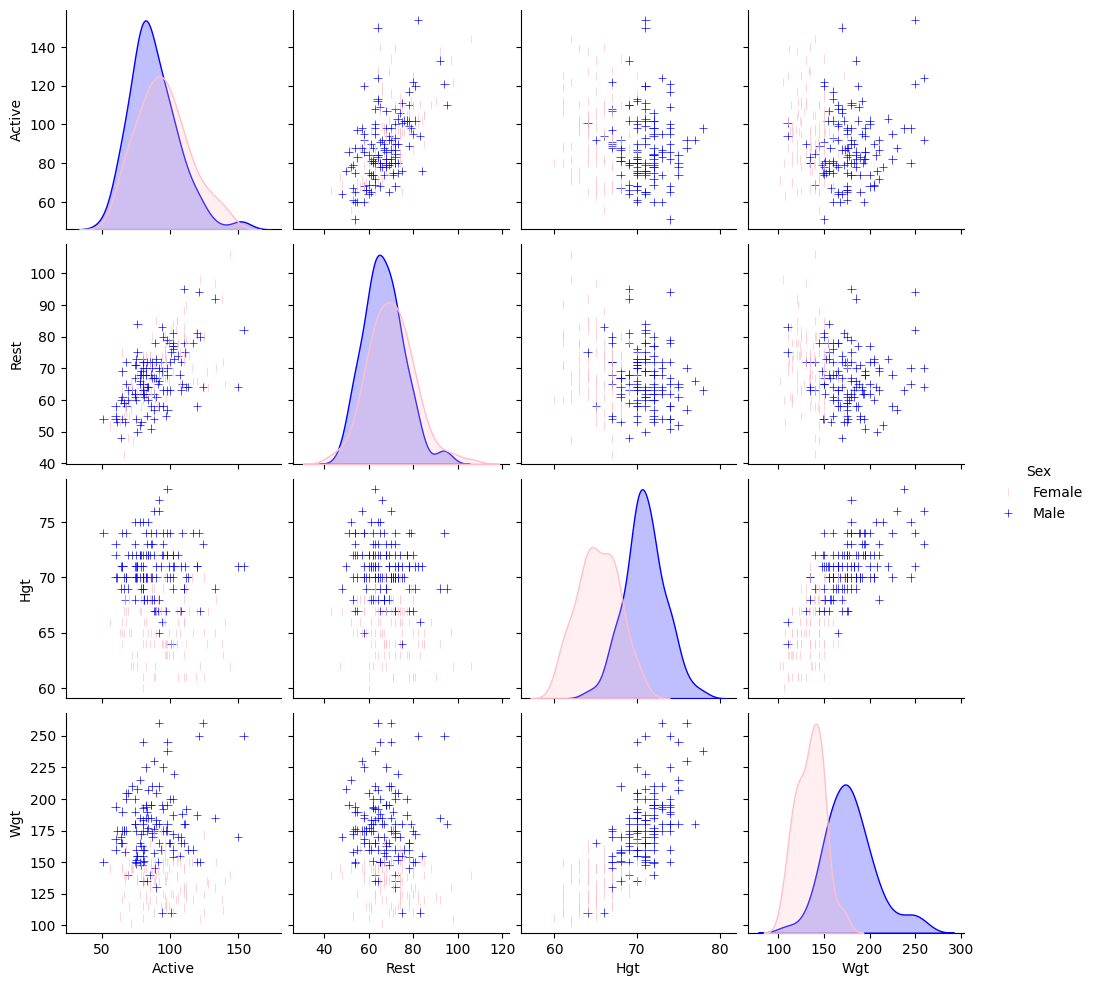

In [18]:
# YOUR CODE HERE
#raise NotImplementedError()
palette={"Male": "blue", "Female": "pink"}
points={"Male": "+", "Female": "|"}
sns.pairplot(pulse, diag_kind="kde", hue="Sex", palette=palette, markers=points)

### b)

W oparciu o dane ze zmiennej `pulse` przygotuj wykresy violinplot i stripplot wybranego przez siebie parametru liczbowego (oś Y) z podziałem na rozróżnioną kolorem płeć (oś X).

Wykresy zestaw na pojedynczej figurze (1x2 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Dodatkowo ustaw:
 - dla wykresu violinplot:
     - inny od domyślnego kolor wykresu,
 - dla wykresu stripplot:
     - inne od domyślnych rozmiar, kolor i przeźroczystość punktów (dobierz parametry tak, aby wykres był jak najbardziej przejrzysty).

C:\Users\Karol\AppData\Local\Temp\ipykernel_19084\3555476533.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.violinplot(pulse, x="Sex", y="Active",hue="Sex", color="blue", ax=axes[0]).set_title("violinplot")
C:\Users\Karol\AppData\Local\Temp\ipykernel_19084\3555476533.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.stripplot(pulse, x="Sex", y="Active",hue="Sex", color="blue", ax=axes[1], size=4, alpha=0.6).set_title("stripplot")


<function matplotlib.pyplot.show(close=None, block=None)>

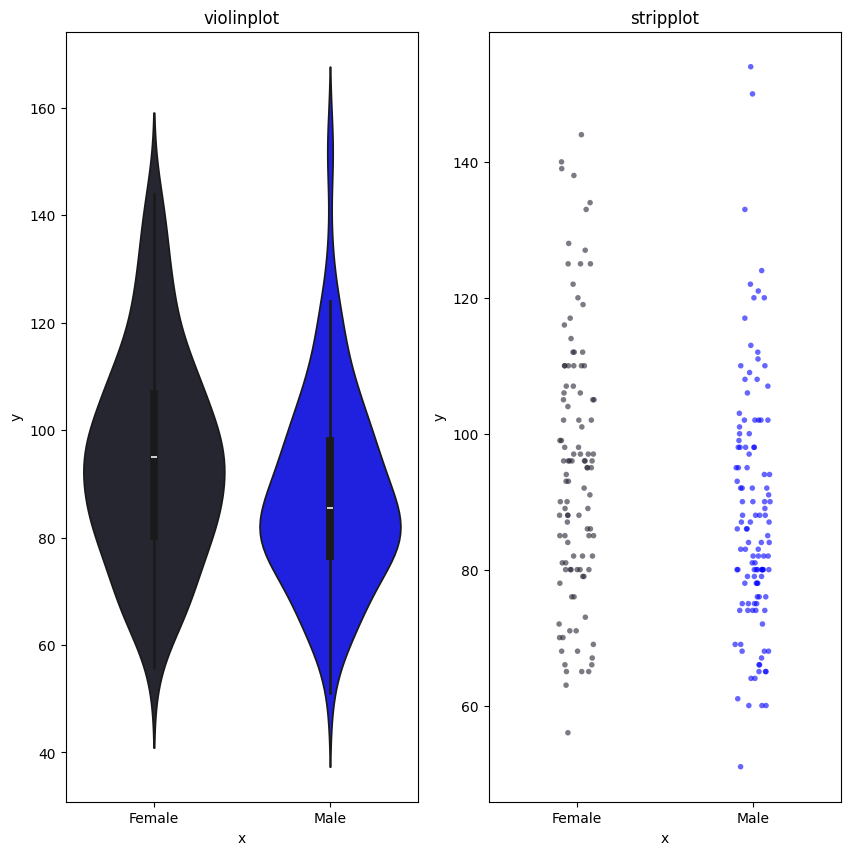

In [21]:
# YOUR CODE HERE
#raise NotImplementedError()
fig, axes=plt.subplots(1,2, figsize=(10,10), facecolor="white")
sns.violinplot(pulse, x="Sex", y="Active",hue="Sex", color="blue", ax=axes[0]).set_title("violinplot")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

sns.stripplot(pulse, x="Sex", y="Active",hue="Sex", color="blue", ax=axes[1], size=4, alpha=0.6).set_title("stripplot")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
plt.show

### c)

Załóżmy, że zmianna `pulse` zawiera pełną populację wyników ekperymentu. Wylosuj z niej i zapisz do zmiennej `sample` próbę losową zawierającą po 20 osób każdej płci wylosowanych bez zwracania.

In [22]:
# YOUR CODE HERE
#raise NotImplementedError()
sample=pulse.groupby("Sex").sample(20, replace=False)
sample

,Active,Rest,Sex,Hgt,Wgt
119,127,69,Female,64,135
163,97,73,Female,67,115
9,70,59,Female,65,115
61,104,82,Female,65,120
43,86,63,Female,65,145
201,106,78,Female,61,122
199,96,74,Female,70,151
161,144,106,Female,62,140
228,82,74,Female,66,124
29,90,85,Female,65,120


In [23]:
# Komórka testowa
assert type(sample) == pd.DataFrame


### d)

Korzystając z dedykowanej do tego funkcji pakietu scipy dokonaj estymacji przedziałowej współczynnika korelacji liniowej między tętnem aktywnym a pasywnym uczestników eksperymentu na poziomie istotności 1-alpha = 0.9.

Wynik zapisz do zmiennej `r_ci` zawierającej listę lub krotkę z dolną i górną granicą przedziału ufności. Ustaw wartość argumentu funkcji odpowiadającego za ziarno generatora liczb losowych funkcji na 127.

In [28]:
# YOUR CODE HERE
#raise NotImplementedError()
def calc_r(x, y):
    return sp.stats.pearsonr(x,y).statistic
cor=sp.stats.bootstrap((pulse["Active"].values.T, pulse["Rest"].values.T),calc_r, paired=True, confidence_level=0.9, random_state=127)
r_ci=[cor.confidence_interval.low, cor.confidence_interval.high]
r_ci

[0.5205432785342576, 0.6788172347787544]

In [29]:
# Komórka testowa
assert type(r_ci)==tuple or type(r_ci)==list
assert len(r_ci)==2
assert isinstance(r_ci[0], float)
assert isinstance(r_ci[1], float)


### e)

Korzystając z dedykowanej funkcji pakietu scipy zweryfikuj hipotezę, że tętna aktywne kobiet i mężczyzn biorących udział w eksperymencie mają taki sam rozkład statystyczny. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.98.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue`, oraz przygotuj zmienną `H` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [39]:
# YOUR CODE HERE
#raise NotImplementedError()
w=pulse.loc[pulse.Sex=="Female", "Active"].dropna()
m=pulse.loc[pulse.Sex=="Male", "Active"].dropna()
pvalue=sp.stats.kstest(w, m).pvalue
pvalue /=2
if pvalue<0.02:
    H=1
else:
    H=0
pvalue

ValueError: unequal length arrays

In [ ]:
# Komórka testowa
assert isinstance(pvalue, float)
assert isinstance(H, float) or isinstance(H, int)
